In [1]:
#get the packages we need in here
import numpy as np
import pandas as pd

import skimage
from skimage import io

import matplotlib.pyplot as plt

import time, os, re, math
from glob import glob

In [2]:
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [3]:
#Load the dataframe that has all of the print info
pd.options.display.max_rows = 999      #make it not show only the first & last 30 rows
IPtable = pd.read_csv('IPresults.csv')

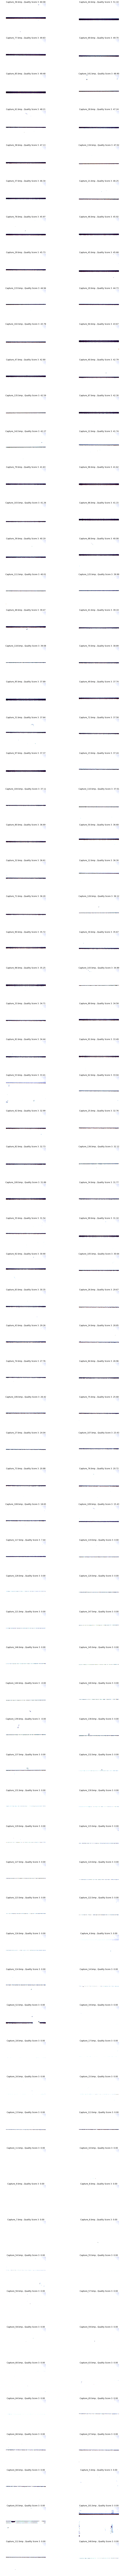

In [5]:


imPaths = glob('../2nd Images/All Images/*.bmp')
imPaths = natural_sort(imPaths)

images = []
filenames = []

# read the images and extract each file name associated
for i, path in enumerate(imPaths):
    images.append( io.imread(path) )
    filenames.append( os.path.basename(imPaths[i]) )

half = math.ceil(len(images)/2)
fig, ax = plt.subplots(half, 2, figsize=(15, half*4), squeeze=False)
ax = ax.ravel()

start_time = time.time()

sortbyQS3 = pd.DataFrame(IPtable.sort_values(by = 'QualityScore3', ascending = False), columns = ['Capture', 'QualityScore3'])
order = list(sortbyQS3.index)


reorderedimages = [images[i] for i in order]


for i, img in enumerate(reorderedimages):
    ax[i].imshow(img)
    #ax[i].set_title(filenames[i])
    title = str(filenames[order[i]])+ ' , Quality Score 3: ' + str("{0:.2f}".format(sortbyQS3.iloc[i]['QualityScore3']))
    ax[i].set_title(title)
    ax[i].axis('off')
    
    

plt.show()